In [5]:
import matplotlib.pyplot as plt
import ltspice
import os

In [6]:
import os
import ltspice

# Base directory
base_dir = 'Model/sim1'

# Dictionary to store parsed data
lt_fimv_dict = {}
lt_fvmi_dict = {}

# Traverse through each directory inside sim1 (config00, config01, config10, config11)
for config_dir in os.listdir(base_dir):
    config_path = os.path.join(base_dir, config_dir)
    
    if os.path.isdir(config_path):
        # Construct paths for the raw files
        fimv_file = os.path.join(config_path, 'IVTesterFullCircuit - FIMV.raw')
        fvmi_file = os.path.join(config_path, 'IVTesterFullCircuit - FVMI.raw')

        # Check if the files exist
        if os.path.exists(fimv_file) and os.path.exists(fvmi_file):
            # Dynamically create unique names for ltspice objects based on config_dir
            config_suffix = config_dir[-2:]  # Extract the last two characters (e.g., 00, 01, 10, 11)

            # Parse the FIMV file and store in dictionary
            print(f'Parsing {fimv_file}...')
            lt_fimv = ltspice.Ltspice(fimv_file)
            lt_fimv.parse()
            lt_fimv_dict[f'lt_fimv_{config_suffix}'] = lt_fimv

            # Parse the FVMI file and store in dictionary
            print(f'Parsing {fvmi_file}...')
            lt_fvmi = ltspice.Ltspice(fvmi_file)
            lt_fvmi.parse()
            lt_fvmi_dict[f'lt_fvmi_{config_suffix}'] = lt_fvmi
        else:
            print(f"Warning: Files not found in {config_path}")

# Now you can access each parsed file by its unique key in the dictionaries:
# Example of how to access parsed data for a specific config
# lt_fimv_00_data = lt_fimv_dict['lt_fimv_00'].data
# lt_fvmi_00_data = lt_fvmi_dict['lt_fvmi_00'].data

Parsing Model/sim1\config00\IVTesterFullCircuit - FIMV.raw...
Parsing Model/sim1\config00\IVTesterFullCircuit - FVMI.raw...
Parsing Model/sim1\config01\IVTesterFullCircuit - FIMV.raw...
Parsing Model/sim1\config01\IVTesterFullCircuit - FVMI.raw...
Parsing Model/sim1\config10\IVTesterFullCircuit - FIMV.raw...
Parsing Model/sim1\config10\IVTesterFullCircuit - FVMI.raw...
Parsing Model/sim1\config11\IVTesterFullCircuit - FIMV.raw...
Parsing Model/sim1\config11\IVTesterFullCircuit - FVMI.raw...


In [7]:
V_00_fimv = lt_fimv_dict['lt_fimv_00'].get_data('V(vmeas)')
I_00_fimv = lt_fimv_dict['lt_fimv_00'].get_data('V(imeas)')

V_01_fimv = lt_fimv_dict['lt_fimv_01'].get_data('V(vmeas)')
I_01_fimv = lt_fimv_dict['lt_fimv_01'].get_data('V(imeas)')

V_10_fimv = lt_fimv_dict['lt_fimv_10'].get_data('V(vmeas)')
I_10_fimv = lt_fimv_dict['lt_fimv_10'].get_data('V(imeas)')

V_11_fimv = lt_fimv_dict['lt_fimv_11'].get_data('V(vmeas)')
I_11_fimv = lt_fimv_dict['lt_fimv_11'].get_data('V(imeas)')



V_00_fvmi = lt_fvmi_dict['lt_fvmi_00'].get_data('V(vmeas)')
I_00_fvmi = lt_fvmi_dict['lt_fvmi_00'].get_data('V(imeas)')

V_01_fvmi = lt_fvmi_dict['lt_fvmi_01'].get_data('V(vmeas)')
I_01_fvmi = lt_fvmi_dict['lt_fvmi_01'].get_data('V(imeas)')

V_10_fvmi = lt_fvmi_dict['lt_fvmi_10'].get_data('V(vmeas)')
I_10_fvmi = lt_fvmi_dict['lt_fvmi_10'].get_data('V(imeas)')

V_11_fvmi = lt_fvmi_dict['lt_fvmi_11'].get_data('V(vmeas)')
I_11_fvmi = lt_fvmi_dict['lt_fvmi_11'].get_data('V(imeas)')

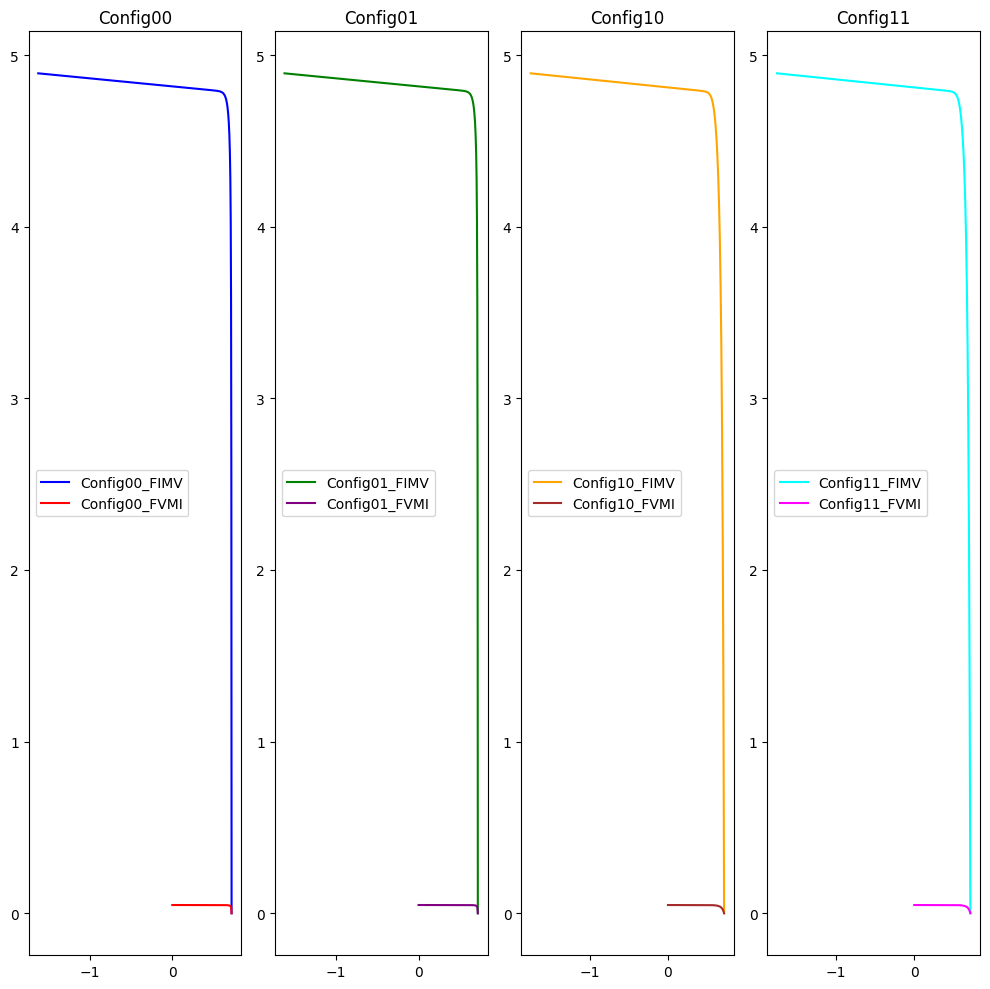

In [8]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(10, 10))

# First subplot (top-left)
axs[0].plot(V_00_fimv, I_00_fimv, label='Config00_FIMV', color='blue')
axs[0].plot(V_00_fvmi, I_00_fvmi, label='Config00_FVMI', color='red')
axs[0].set_title('Config00')
axs[0].legend()

# Second subplot (top-right)
axs[1].plot(V_01_fimv, I_01_fimv, label='Config01_FIMV', color='green')
axs[1].plot(V_01_fvmi, I_01_fvmi, label='Config01_FVMI', color='purple')
axs[1].set_title('Config01')
axs[1].legend()

# Third subplot (bottom-left)
axs[2].plot(V_10_fimv, I_10_fimv, label='Config10_FIMV', color='orange')
axs[2].plot(V_10_fvmi, I_10_fvmi, label='Config10_FVMI', color='brown')
axs[2].set_title('Config10')
axs[2].legend()

# Fourth subplot (bottom-right)
axs[3].plot(V_11_fimv, I_11_fimv, label='Config11_FIMV', color='cyan')
axs[3].plot(V_11_fvmi, I_11_fvmi, label='Config11_FVMI', color='magenta')
axs[3].set_title('Config11')
axs[3].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

(0.0, 0.8)

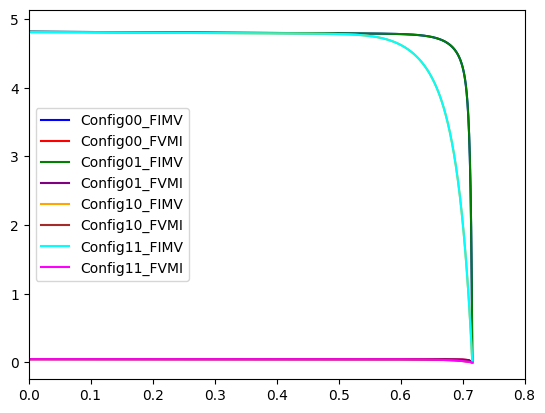

In [ ]:
plt.plot(V_00_fimv, I_00_fimv, label='Config00_FIMV', color='blue')
plt.plot(V_00_fvmi, I_00_fvmi, label='Config00_FVMI', color='red')

plt.plot(V_01_fimv, I_01_fimv, label='Config01_FIMV', color='green')
plt.plot(V_01_fvmi, I_01_fvmi, label='Config01_FVMI', color='purple')

plt.plot(V_10_fimv, I_10_fimv, label='Config10_FIMV', color='orange')
plt.plot(V_10_fvmi, I_10_fvmi, label='Config10_FVMI', color='brown')

plt.plot(V_11_fimv, I_11_fimv, label='Config11_FIMV', color='cyan')
plt.plot(V_11_fvmi, I_11_fvmi, label='Config11_FVMI', color='magenta')
plt.legend()
plt.xlim([0,0.8])

(0.0, 0.8)

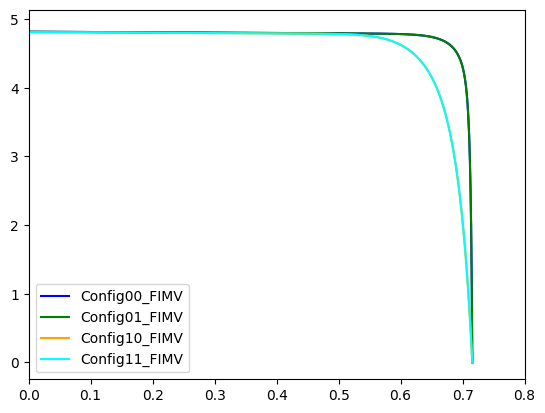

In [ ]:
plt.plot(V_00_fimv, I_00_fimv, label='Config00_FIMV', color='blue')
plt.plot(V_01_fimv, I_01_fimv, label='Config01_FIMV', color='green')
plt.plot(V_10_fimv, I_10_fimv, label='Config10_FIMV', color='orange')
plt.plot(V_11_fimv, I_11_fimv, label='Config11_FIMV', color='cyan')
plt.legend()
plt.xlim([0,0.8])

(0.0, 0.8)

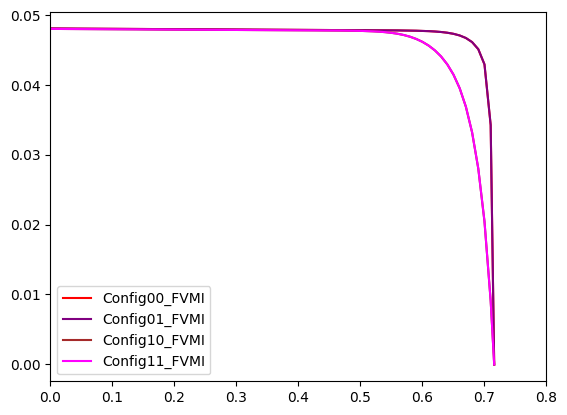

In [ ]:
plt.plot(V_00_fvmi, I_00_fvmi, label='Config00_FVMI', color='red')
plt.plot(V_01_fvmi, I_01_fvmi, label='Config01_FVMI', color='purple')
plt.plot(V_10_fvmi, I_10_fvmi, label='Config10_FVMI', color='brown')
plt.plot(V_11_fvmi, I_11_fvmi, label='Config11_FVMI', color='magenta')
plt.legend()
plt.xlim([0,0.8])